### 作业05：从页面能得到什么 

<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge" />
  <meta http-equiv="Cache-Control" content="no-transform" />
  <meta http-equiv="Cache-Control" content="no-siteapp" />
  <meta http-equiv="Content-language" content="zh-CN" />
  <meta name="format-detection" content="telephone=no" />
  <meta name="applicable-device" content="pc">
  <meta http-equiv="Cache-Control" content="no-transform " />

  <!-- seo关键字相关信息 -->
  <meta name="description" content="贝壳上海租房网,提供真实的上海租房信息、出租房源信息、租房价格,包括上海整租、合租、公寓出租等信息,以及上海房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来上海贝壳租房!">
  <meta name="keywords" content="上海租房信息,上海出租房网,上海房屋出租价格">
  <title>上海租房信息_上海出租房源|房屋出租价格【上海贝壳租房】</title>

  

  <!--地址信息-->
  <meta name="location" content="province=上海;city=上海">

  <!-- 网站ico图标 -->
    <link href="https://s1.ljcdn.com/matrix_pc/dist/pc/src/resource/lianjia/favicon.ico?_v=2019090517392894d" type="image/x-icon" rel="icon">

   
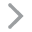

finished!
<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge" />
  <meta http-equiv="Cache-Control" content="no-transform" />
  <meta http-equiv="Cache-Control" content="no-siteapp" />
  <meta http-equiv="Content-language" content="zh-CN" />
  <meta name="format-detection" content="telephone=no" />
  <meta name="applicable-device" content="pc">
  <meta http-equiv="Cache-Control" content="no-transform " />

  <!-- seo关键字相关信息 -->
  <meta name="description" content="贝壳上海租房网,提供真实的上海租房信息、出租房源信息、租房价格,包括上海整租、合租、公寓出租等信息,以及上海房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来上海贝壳租房!">
  <meta name="keywords" content="上海租房信息,上海出租房网,上海房屋出租价格">
  <title>上海租房信息_上海出租房源|房屋出租价格【上海贝壳租房】</title>

  

  <!--地址信息-->
  <meta name="location" content="province=上海;city=上海">

  <!-- 网站ico图标 -->
    <link href="https://s1.ljcdn.com/matrix_pc/dist/pc/src/resource/lianjia/favicon.ico?_v=2019090517392894d" type="image/x-icon" rel="i
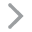

<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=utf-8">
  <meta http-equiv="X-UA-Compatible" content="IE=edge" />
  <meta http-equiv="Cache-Control" content="no-transform" />
  <meta http-equiv="Cache-Control" content="no-siteapp" />
  <meta http-equiv="Content-language" content="zh-CN" />
  <meta name="format-detection" content="telephone=no" />
  <meta name="applicable-device" content="pc">
  <meta http-equiv="Cache-Control" content="no-transform " />

  <!-- seo关键字相关信息 -->
  <meta name="description" content="贝壳上海租房网,提供真实的上海租房信息、出租房源信息、租房价格,包括上海整租、合租、公寓出租等信息,以及上海房屋出租个人信息、经纪人信息、品牌公寓信息等.找租房房源,就来上海贝壳租房!">
  <meta name="keywords" content="上海租房信息,上海出租房网,上海房屋出租价格">
  <title>上海租房信息_上海出租房源|房屋出租价格【上海贝壳租房】</title>

  

  <!--地址信息-->
  <meta name="location" content="province=上海;city=上海">

  <!-- 网站ico图标 -->
    <link href="https://s1.ljcdn.com/matrix_pc/dist/pc/src/resource/lianjia/favicon.ico?_v=2019090517392894d" type="image/x-icon" rel="icon">

   
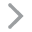

In [84]:
# -*- coding:utf-8 -*-

from bs4 import BeautifulSoup
import requests
import time
import csv
import time

headers = {
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'zh-CN,zh;q=0.9',
    'Connection': 'keep-alive',
    'Host': 'sh.lianjia.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/76.0.3809.132 Safari/537.36',
}
# zufang_url = 'https://sh.lianjia.com/zufang/pg1/#contentList'
# 获取page：1-3
for i in range(1, 4):
    zufang_url = 'https://sh.lianjia.com/zufang/pg%d/#contentList' % i
    try:
        zufang_req = requests.get(zufang_url, headers=headers)
        zufang_req.encoding = 'utf8'
        zufang_rep = zufang_req.text
        time.sleep(1)
    except requests.exceptions.SSLError as err:
        zufang_req = requests.get(zufang_url, headers=headers, verify=False)
        zufang_req.encoding = 'utf8'
        zufang_rep = zufang_req.text
        time.sleep(1)
    except Exception as errs:
        print(errs)
    print(zufang_rep)
    soup = BeautifulSoup(zufang_rep, 'html.parser')
    filename = soup.title.get_text().split('|', 1)[0]
    # print(filename)
    contents_list = soup.find_all('div', class_='content__list--item')

    csv_headers = ['名称', '详情页', '位置', '面积', '朝向', '租金', '户型', '发布时间', '其他' ]
    date = time.strftime('%Y%m%d', time.localtime())

    with open('%s%s.csv' % (filename, date), 'w+', newline='', encoding='utf_8_sig') as f:
        f_csv = csv.writer(f)
        f_csv.writerow(csv_headers)
        for i in contents_list:
            tag_a_aside = i.find('a', class_='content__list--item--aside')
            house_pub_name = tag_a_aside['title']  # 房源发布名称
            house_detail_page = 'https://sh.lianjia.com' + tag_a['href']  # 房源详情页
            house_locate, house_acreage, house_towards, house_type = '', '', '', '' 
            tag_p_des = i.find('p', class_='content__list--item--des')
            tag_p_time = i.find('p', class_='content__list--item--time oneline')
            tag_span_price = i.find('span', class_='content__list--item-price')
            tag_p_bottom = i.find('p', class_='content__list--item--bottom oneline')
            house_pub_time = ''.join(tag_p_time.get_text())
            house_price = ''.join(tag_span_price.get_text())
            house_other = tag_p_bottom.get_text()
            des = tag_p_des.get_text().split('/')
            des_list = []
            for k in des:
                k = ''.join(k).replace('\n', '').replace(' ', '')
                des_list.append(k) 
            try:
                house_locate = des_list[0]  # 房源位置
                house_acreage = des_list[1]  # 房源面积
                house_towards = des_list[2]  # 房源朝向
                house_type = des_list[3]  # 房源户型
            except IndexError as indexerr:
                print('indexerr')
            csv_row = [
                house_pub_name, 
                house_detail_page, 
                house_locate, 
                house_acreage, 
                house_towards, 
                house_price,
                house_type, 
                house_pub_time,
                house_other,
            ]
            f_csv.writerow(csv_row)
    #         print("=============================")
    print('finished!') 

finished!
